# Pre-process LINCS L1000 dataset

**Alexandra Lee**

**created October 2018**

Pre-processing steps include:
1. Select only landmark genes from LINCS database
2. Normalize data
3. Partition dataset into training and validation sets

Note:  Using python 2 in order to support parsing cmap function

In [ ]:
import pandas as pd
import os
import numpy as np
from scipy.stats import variation
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

import sys
from cmapPy.pandasGEXpress.parse import parse

randomState = 123
from numpy.random import seed
seed(randomState)

In [4]:
# Output files
train_file = "/home/alexandra/Documents/Data/LINCS/train_model_input.txt.xz"
validation_file = "/home/alexandra/Documents/Data/LINCS/validation_model_input.txt.xz"

## About dataset
Read in gene expression data (GCToo object with 3 embedded dataframes include data_df)
Data downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE92742
 
cid = samples
rid = genes
values = normalized and imputed (based on landmark genes) gene expression --> log fold change compared against negative control

Note:  Data is too large to be housed in repo

In [5]:
%%time
data_file = "/home/alexandra/Documents/Data/LINCS/GSE92742_Broad_LINCS_Level3_INF_mlr12k_n1319138x12328.gctx"

# Keep only landmark genes
gene_info_file = os.path.join(
    os.path.dirname(
        os.getcwd()), "metadata","GSE92742_Broad_LINCS_gene_info.txt")

gene_info = pd.read_table(gene_info_file, dtype=str)
landmark_gene_row_ids = gene_info["pr_gene_id"][gene_info["pr_is_lm"] == "1"]

data = parse(data_file, rid = landmark_gene_row_ids)

data_df = data.data_df.T

CPU times: user 7.1 s, sys: 51.6 s, total: 58.7 s
Wall time: 6min 7s


In [4]:
data_df.shape

(1319138, 978)

In [6]:
# Normalization
# scale data to range (0,1) per gene
data_scaled_df = (
    preprocessing
    .MinMaxScaler()
    .fit_transform(data_df)
)

data_scaled_df = pd.DataFrame(data_scaled_df,
                                columns=data_df.columns,
                                index=data_df.index)
del data_df

data_scaled_df.head(5)

rid,5720,466,6009,2309,387,3553,427,5898,23365,6657,...,9738,6793,7358,58472,50865,23200,51293,10962,10153,874
cid,,,,,,,,,,,,,,,,,,,,,
CPC005_A375_6H_X1_B3_DUO52HI53LO:K06,0.736540,0.544533,0.852929,0.363640,0.561647,0.313570,0.385488,0.612467,0.343652,0.250845,...,0.453477,0.400785,0.531635,0.299071,0.433057,0.531077,0.736812,0.761088,0.624022,0.412310
CPC005_A375_6H_X2_B3_DUO52HI53LO:K06,0.707430,0.519123,0.802998,0.421900,0.491247,0.343975,0.359491,0.617536,0.334867,0.330806,...,0.433409,0.396231,0.549793,0.312744,0.469197,0.573592,0.776966,0.709637,0.661218,0.533310
CPC005_A375_6H_X3_B3_DUO52HI53LO:K06,0.712130,0.516403,0.822841,0.404537,0.540393,0.296886,0.429730,0.588535,0.384498,0.258588,...,0.414654,0.426433,0.533961,0.308757,0.435564,0.508652,0.759025,0.731127,0.647835,0.485909
CPC005_A375_6H_X1_B3_DUO52HI53LO:C19,0.707830,0.548493,0.847084,0.359540,0.582520,0.343702,0.358237,0.612997,0.330637,0.269134,...,0.422994,0.428953,0.473934,0.295685,0.442730,0.483017,0.716187,0.708171,0.647835,0.386021
CPC005_A375_6H_X2_B3_DUO52HI53LO:C19,0.687703,0.499747,0.811237,0.424813,0.461340,0.363575,0.343226,0.629484,0.286045,0.423899,...,0.351104,0.434434,0.584571,0.322470,0.657456,0.597484,0.745323,0.672260,0.655874,0.483393


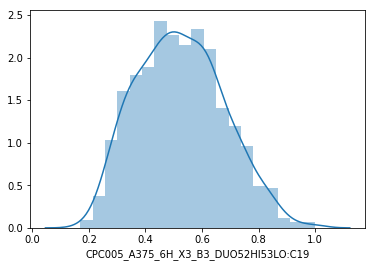

In [16]:
sns.distplot(data_scaled_df.iloc[5])

In [6]:
# Split dataset into training and validation sets
validation_set_percent = 0.001
validation_df = data_scaled_df.sample(frac=validation_set_percent, random_state=randomState)
train_df = data_scaled_df.drop(validation_df.index)

print(validation_df.shape)
print(train_df.shape)

(1319, 978)
(1317819, 978)


In [7]:
# Output
train_df.to_csv(train_file, sep='\t', compression='xz')
validation_df.to_csv(validation_file, sep='\t', compression='xz')